In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters for the analysis
total_genes = 20000
regulation_scores = np.random.normal(loc=0, scale=1, size=total_genes)
sorted_indices = np.argsort(regulation_scores)[::-1]

dataset_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
top_genes_numbers = [25, 50, 75, 100]
num_tests = 100

In [3]:
results_df = pd.DataFrame(columns=['Dataset Size', 'Top Genes Number', 'Fraction'])

In [4]:
# Perform the simulations
for T in dataset_sizes:
    for g in top_genes_numbers:
        top_g_genes = set(sorted_indices[:g])
        fractions = []
        for _ in range(num_tests):
            simulated_dataset = set(np.random.choice(total_genes, T, replace=False))
            S = len(simulated_dataset.intersection(top_g_genes))
            fraction = S / 100
            fractions.append(fraction if S > 0 else 0)  # Only count runs with at least one top gene
        results_df = pd.concat([results_df, pd.DataFrame({
            'Dataset Size': [T] * num_tests,
            'Top Genes Number': [g] * num_tests,
            'Fraction': fractions
        })], ignore_index=True)

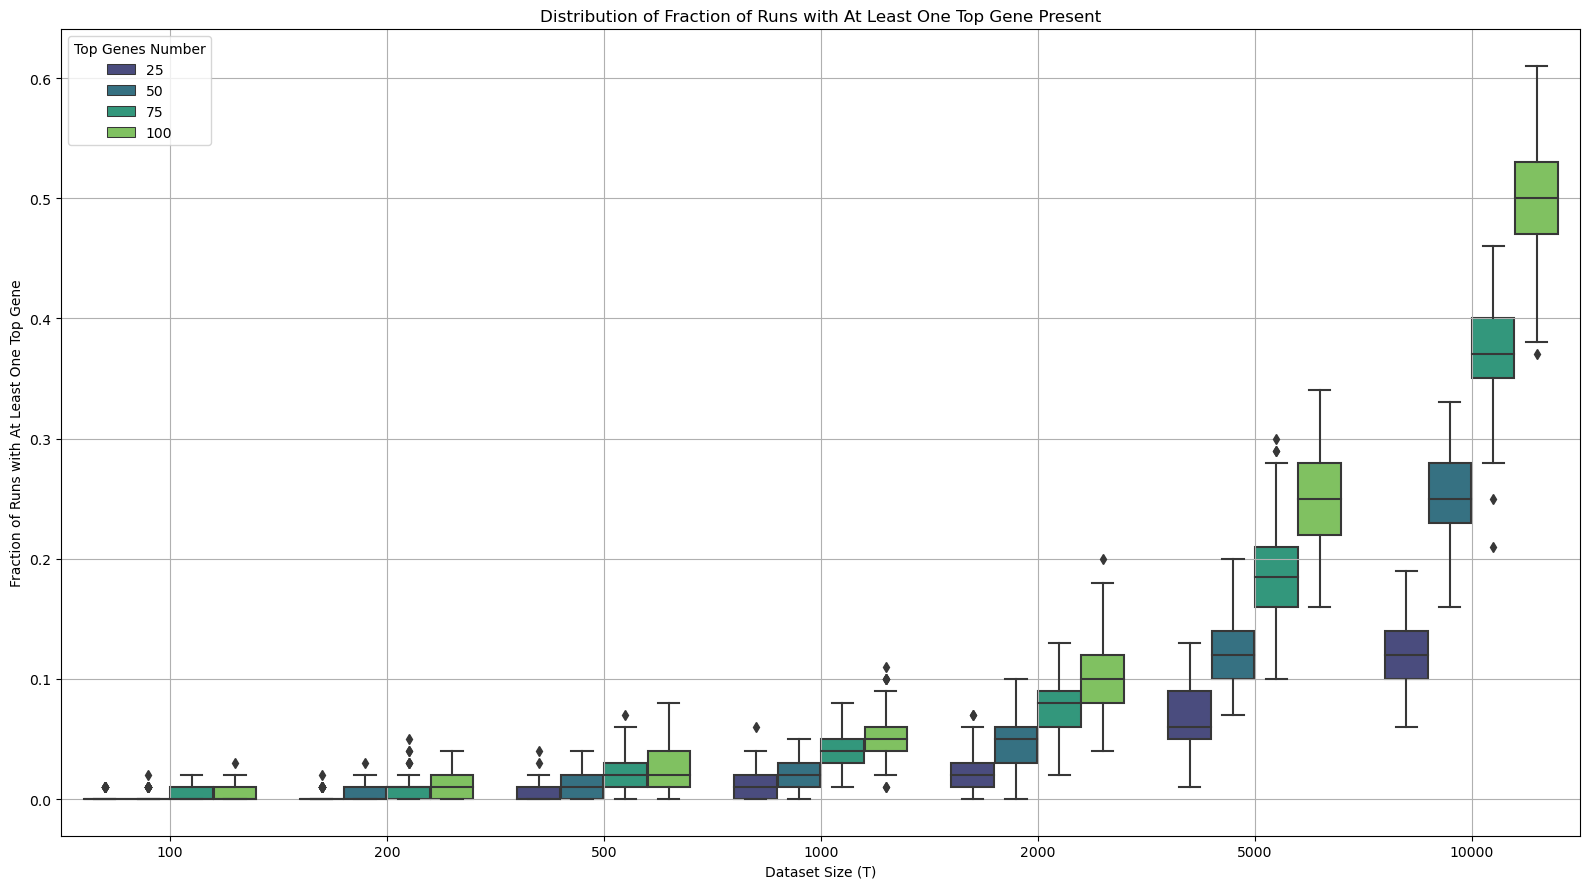

In [5]:
# Plotting the figure
plt.figure(figsize=(16, 9))
sns.boxplot(data=results_df, x='Dataset Size', y='Fraction', hue='Top Genes Number', palette='viridis')
plt.xticks(ticks=range(len(dataset_sizes)), labels=[str(size) for size in dataset_sizes])
plt.xlabel('Dataset Size (T)')
plt.ylabel('Fraction of Runs with At Least One Top Gene')
plt.title('Distribution of Fraction of Runs with At Least One Top Gene Present')
plt.grid(True)
plt.tight_layout()
plt.show()